# Desarrollo de Aplicaciones para el Análisis de Datos. - Práctica 2
---

Ahora es tu turno de analizar un banco de datos del mundo real que contiene datos de vuelos del Departamento de Transporte de Estados Unidos

Primero carga y visualiza los datos. (flights.csv)

In [2]:
import pandas as pd
df = pd.read_csv('./flights.csv')

El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la lleg

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips:
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

In [3]:
#escribe tu código aqui

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [5]:
df1 = df[df.isna().any(axis=1)]
print (df1)

        Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
171     2013      4          18          4      DL            10397   
359     2013      5          22          3      OO            11433   
429     2013      7           3          3      MQ            13851   
545     2013      4          13          6      FL            14524   
554     2013      5           8          3      EV            12953   
...      ...    ...         ...        ...     ...              ...   
271410  2013      8           5          1      WN            14831   
271607  2013      6          18          2      EV            14100   
271634  2013      5           8          3      AA            11298   
271671  2013     10           8          2      WN            12892   
271885  2013      5          15          3      US            14771   

                               OriginAirportName         OriginCity  \
171     Hartsfield-Jackson Atlanta International            Atlanta   
359  

In [6]:
df.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [7]:
dft = df[["Carrier", "ArrDelay"]]
df1 = dft.groupby(["Carrier"]).mean()
print(df1)

          ArrDelay
Carrier           
9E        5.100463
AA        7.288294
AS       -0.129657
B6        9.841757
DL        2.415259
EV       10.112552
F9       11.460147
FL        7.611958
HA        1.443321
MQ       13.220602
OO        6.054447
UA        4.847762
US        4.011702
VX        9.453929
WN        8.062512
YV        7.871276


In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
# Ajustamos el modelo e imputamos los missing values
imputer.fit(df[["DepDel15"]])
df["DepDel15"] = imputer.transform(df[["DepDel15"]]).ravel()

print("Valores perdidos en DepDel15: " + str(df['DepDel15'].isnull().sum()))
df.isnull().sum()

Valores perdidos en DepDel15: 0


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

<Axes: xlabel='DayOfWeek'>

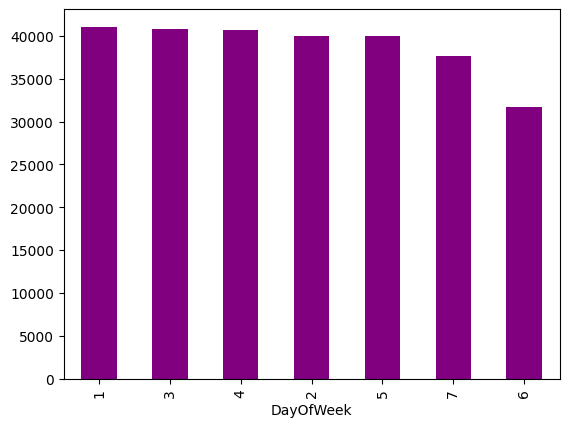

In [55]:
import matplotlib.pyplot as plt
dft2 = df[['DayOfWeek', 'CRSArrTime']]
df2 = dft2['DayOfWeek'].value_counts()
wdays = {'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'}
df2.plot.bar(color='purple')

In [56]:
##Indice de Ro Aeropuerto y DepDelay

In [49]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
df3 = df[['OriginAirportName','DepDelay']]
dft = df3.groupby('OriginAirportName').mean().sort_values(by='OriginAirportName', ascending=True)
dft['Origin'] = df['OriginAirportName'].sort_values().unique()
dft
le = LabelEncoder()
dft['Number'] = le.fit_transform(dft['Origin'])
correlation, _ = stats.pointbiserialr(dft['Number'], dft['DepDelay'])
print(f"Point-Biserial Correlation Coefficient: {correlation}")

Point-Biserial Correlation Coefficient: -0.24877376671634216


In [11]:
dft['OriginAirportName'].unique()

array(['Tampa International', 'Pittsburgh International',
       'Seattle/Tacoma International', "Chicago O'Hare International",
       'Norfolk International', 'John F. Kennedy International',
       'Metropolitan Oakland International',
       'Washington Dulles International', 'Los Angeles International',
       'Orlando International',
       'Baltimore/Washington International Thurgood Marshall',
       'Dallas/Fort Worth International',
       'Phoenix Sky Harbor International',
       'Charlotte Douglas International', 'McCarran International',
       'William P Hobby', 'Denver International',
       'Detroit Metro Wayne County', 'Eppley Airfield',
       'Sacramento International',
       'Hartsfield-Jackson Atlanta International',
       'Salt Lake City International', 'Logan International',
       'San Francisco International',
       'George Bush Intercontinental/Houston',
       'San Antonio International', 'Minneapolis-St Paul International',
       'Kansas City Internatio